In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso, Ridge

In [2]:
london_m=pd.read_csv('londonairbnb_cleaned.csv')
london_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85256 entries, 0 to 85255
Data columns (total 56 columns):
id                                  85256 non-null float64
experiences_offered                 85256 non-null object
host_since                          85256 non-null object
host_response_rate                  85256 non-null int64
host_is_superhost                   85256 non-null int64
host_total_listings_count           85256 non-null int64
host_verifications                  85256 non-null object
host_has_profile_pic                85256 non-null int64
host_identity_verified              85256 non-null int64
neighbourhood                       85256 non-null object
neighbourhood_cleansed              85256 non-null object
city                                85078 non-null object
latitude                            85256 non-null float64
longitude                           85256 non-null float64
is_location_exact                   85256 non-null int64
property_type           

In [3]:
num=['float64', 'int64']
notused_col=['id', 'latitude', 'longitude']
categorical_values=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 
                    'requires_license', 'instant_bookable', 'require_guest_profile_picture',
                    'require_guest_phone_verification']
london=london_m.copy()
london_numeric=london.select_dtypes(num)
london_num_cat=london_numeric.drop(notused_col, axis=1)
london_num = london_num_cat.drop(categorical_values, axis=1)
london_num.columns

Index(['host_response_rate', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'host_days',
       'days_from_last_review'],
      dtype='object')

In [4]:
y=london_num['price']
X=london_num.drop(['price'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.7)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Training r^2:', linreg.score(X_train, y_train))
print('Testing r^2:', linreg.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test)))

Training r^2: 0.04812202043699165
Testing r^2: -657404.4636521765
Training MSE: 191895.37192053313
Testing MSE: 123467847583.60243


In [6]:
stdscaler = StandardScaler()
stdscaler.fit(X_train, y_train)
    
X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = stdscaler.transform(X_test), columns = X_test.columns)

    

In [7]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

print('Training r^2:', linreg.score(X_train_scaled, y_train))
print('Testing r^2:', linreg.score(X_test_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test_scaled)))

Training r^2: 0.04812202043699165
Testing r^2: -657404.4636143057
Training MSE: 191895.37192053313
Testing MSE: 123467847576.48987


In [8]:
london_num.columns

Index(['host_response_rate', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'host_days',
       'days_from_last_review'],
      dtype='object')

In [9]:
london_num.shape

(85256, 31)

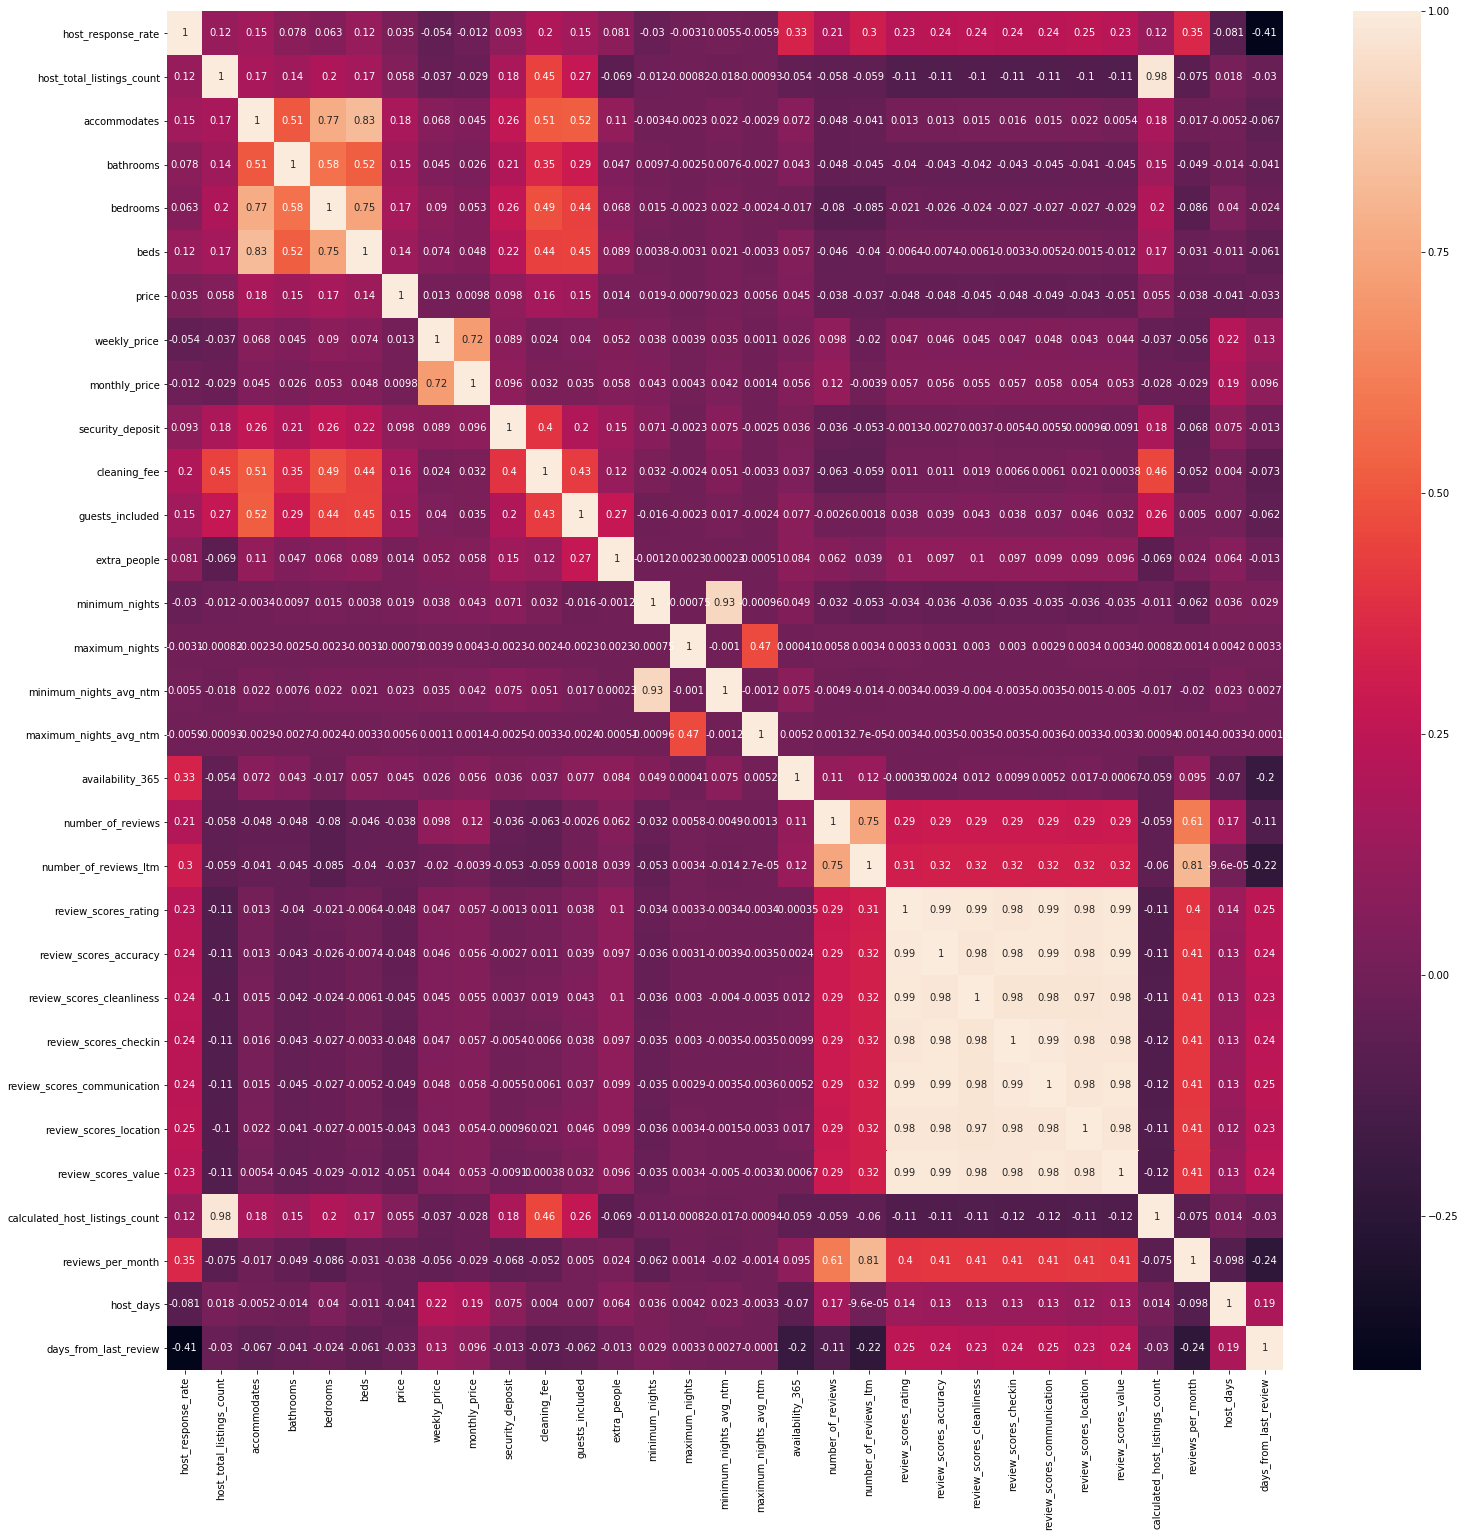

In [10]:
var_corr = london_num.corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(25,25))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)

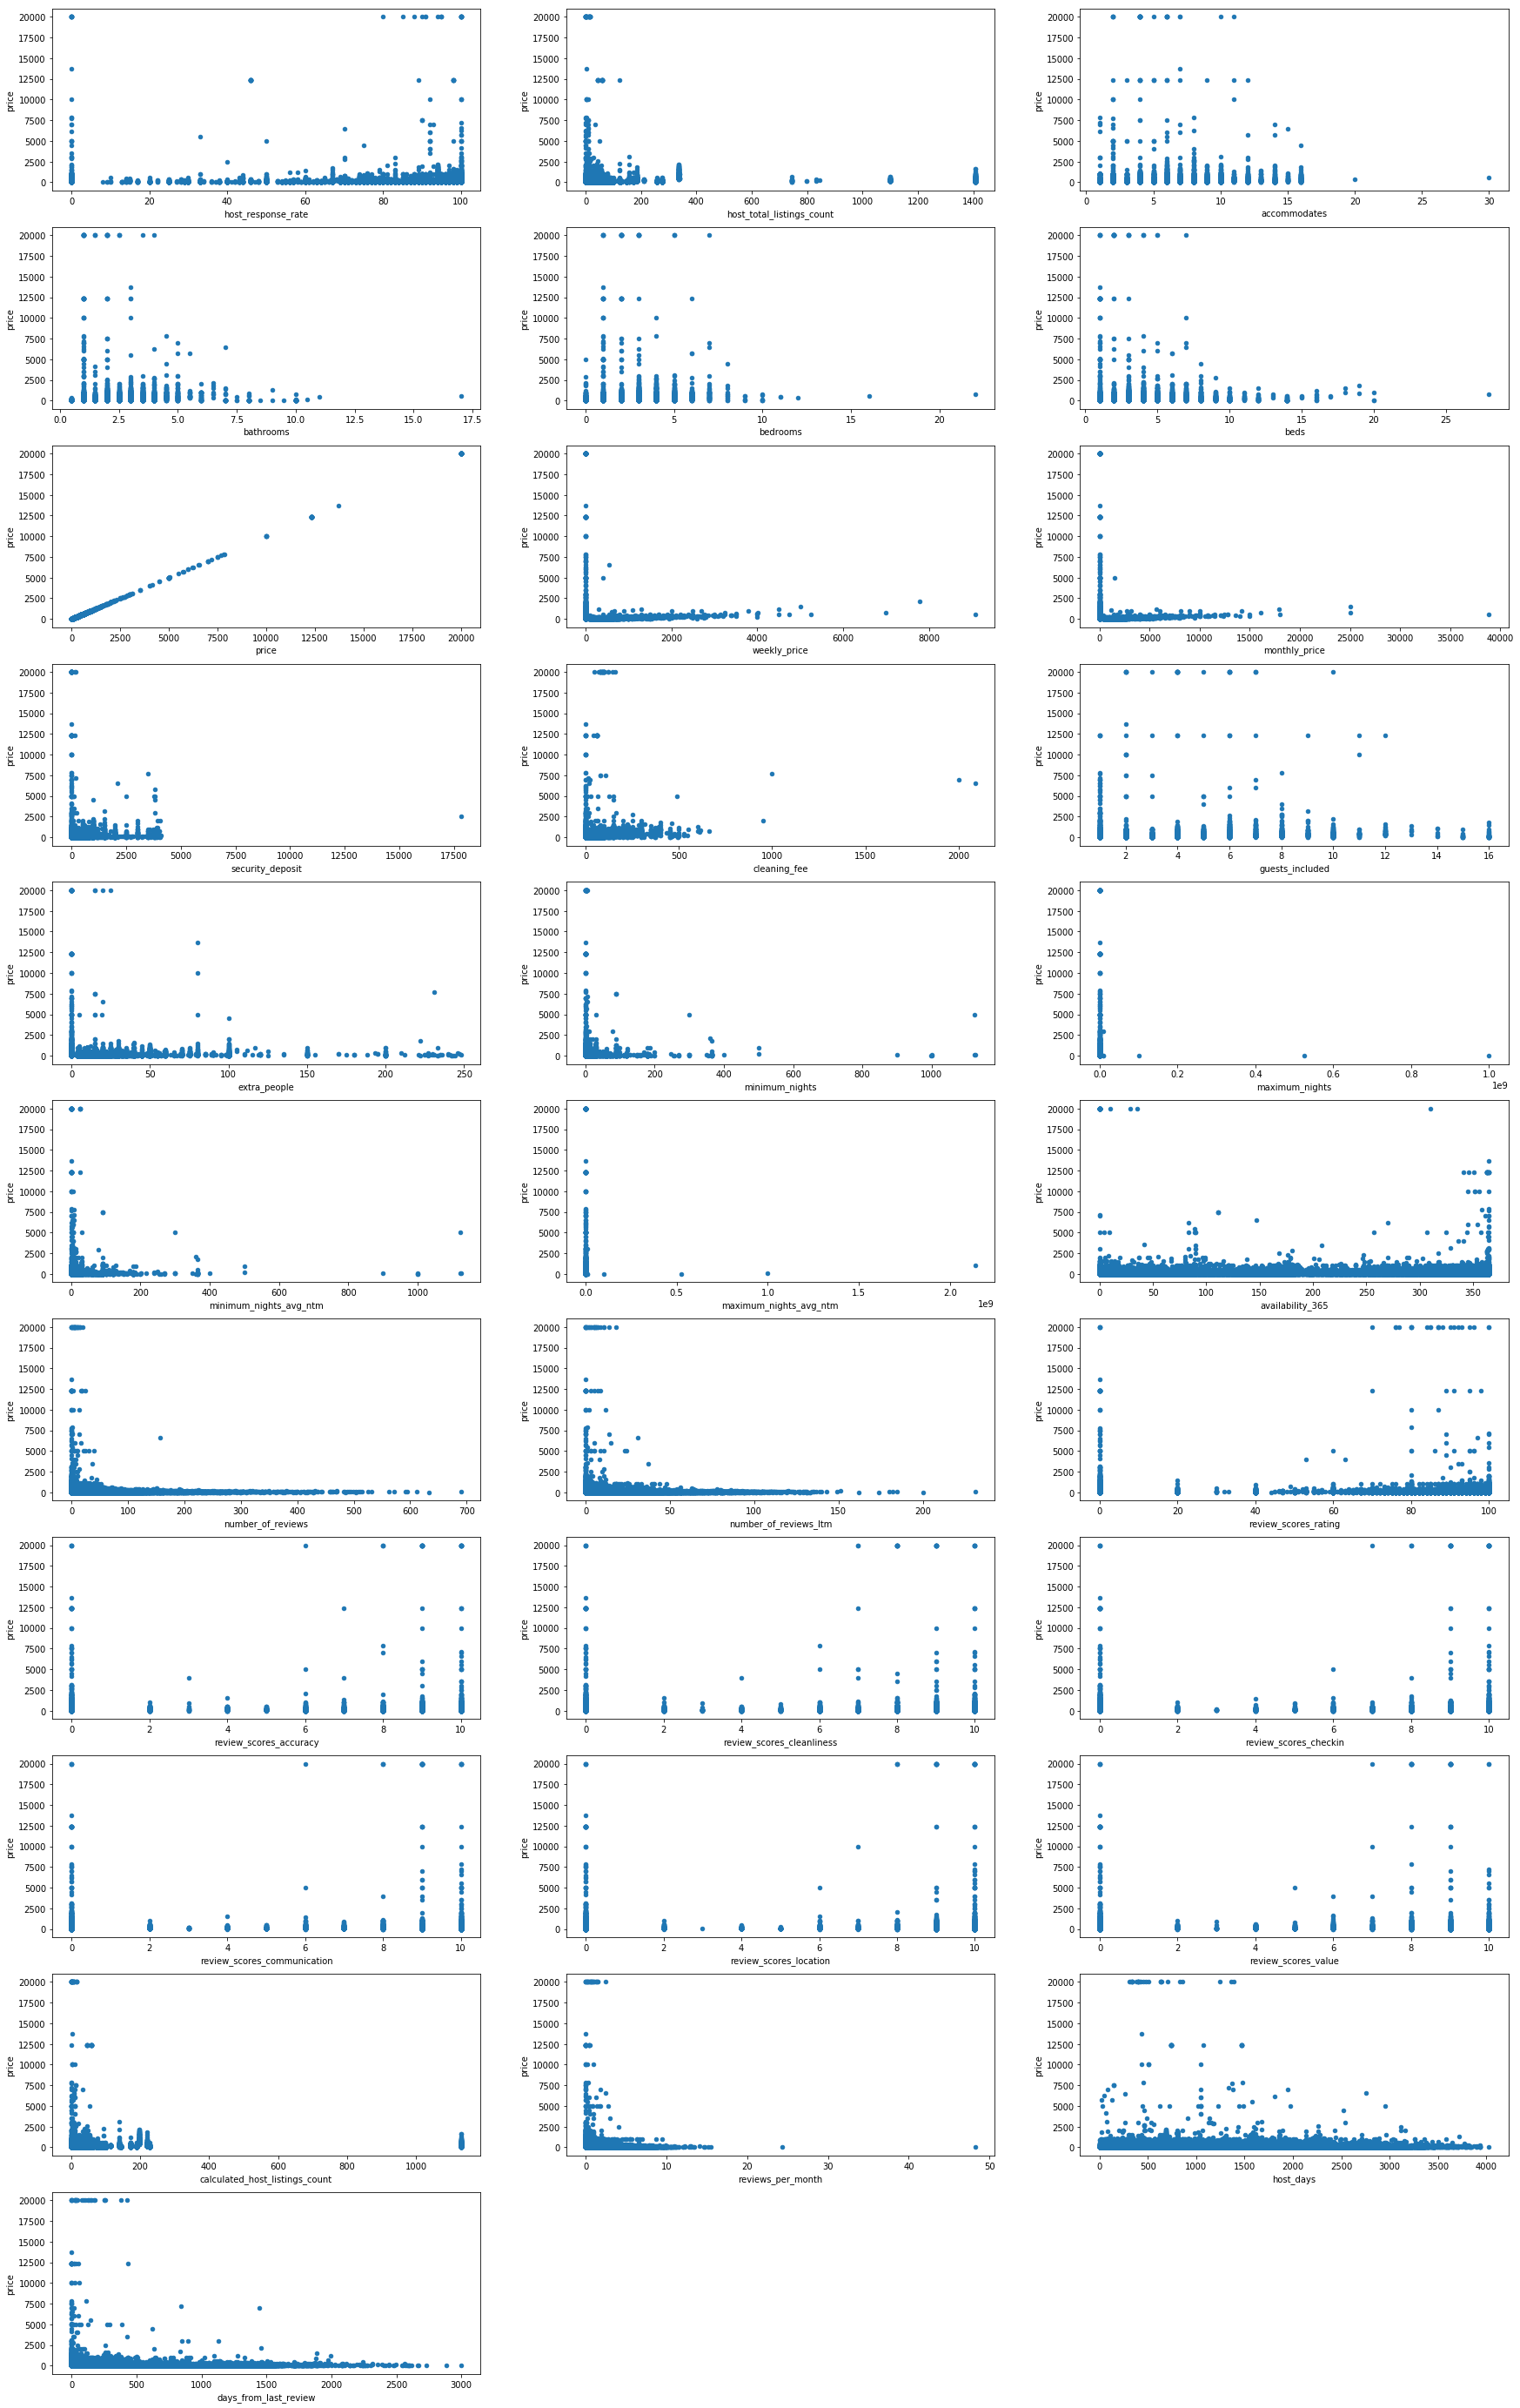

In [11]:
fig = plt.figure(figsize=(30,50))

for i, col in enumerate(london_num.columns):
    ax = fig.add_subplot(11, 3, i+1)
    london_num.plot.scatter(x = col, y = "price", ax=ax)
    

In [12]:
london_num.columns

Index(['host_response_rate', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'host_days',
       'days_from_last_review'],
      dtype='object')

In [13]:
london_cat=london_num_cat[categorical_values]
london_merged=pd.concat([london_cat, london_num], axis=1)

In [14]:
london_merged_z=london_merged[(np.abs(stats.zscore(london_merged)) < 3).all(axis=1)]


In [15]:

london_num_z=london_num[(np.abs(stats.zscore(london_num)) < 3).all(axis=1)]


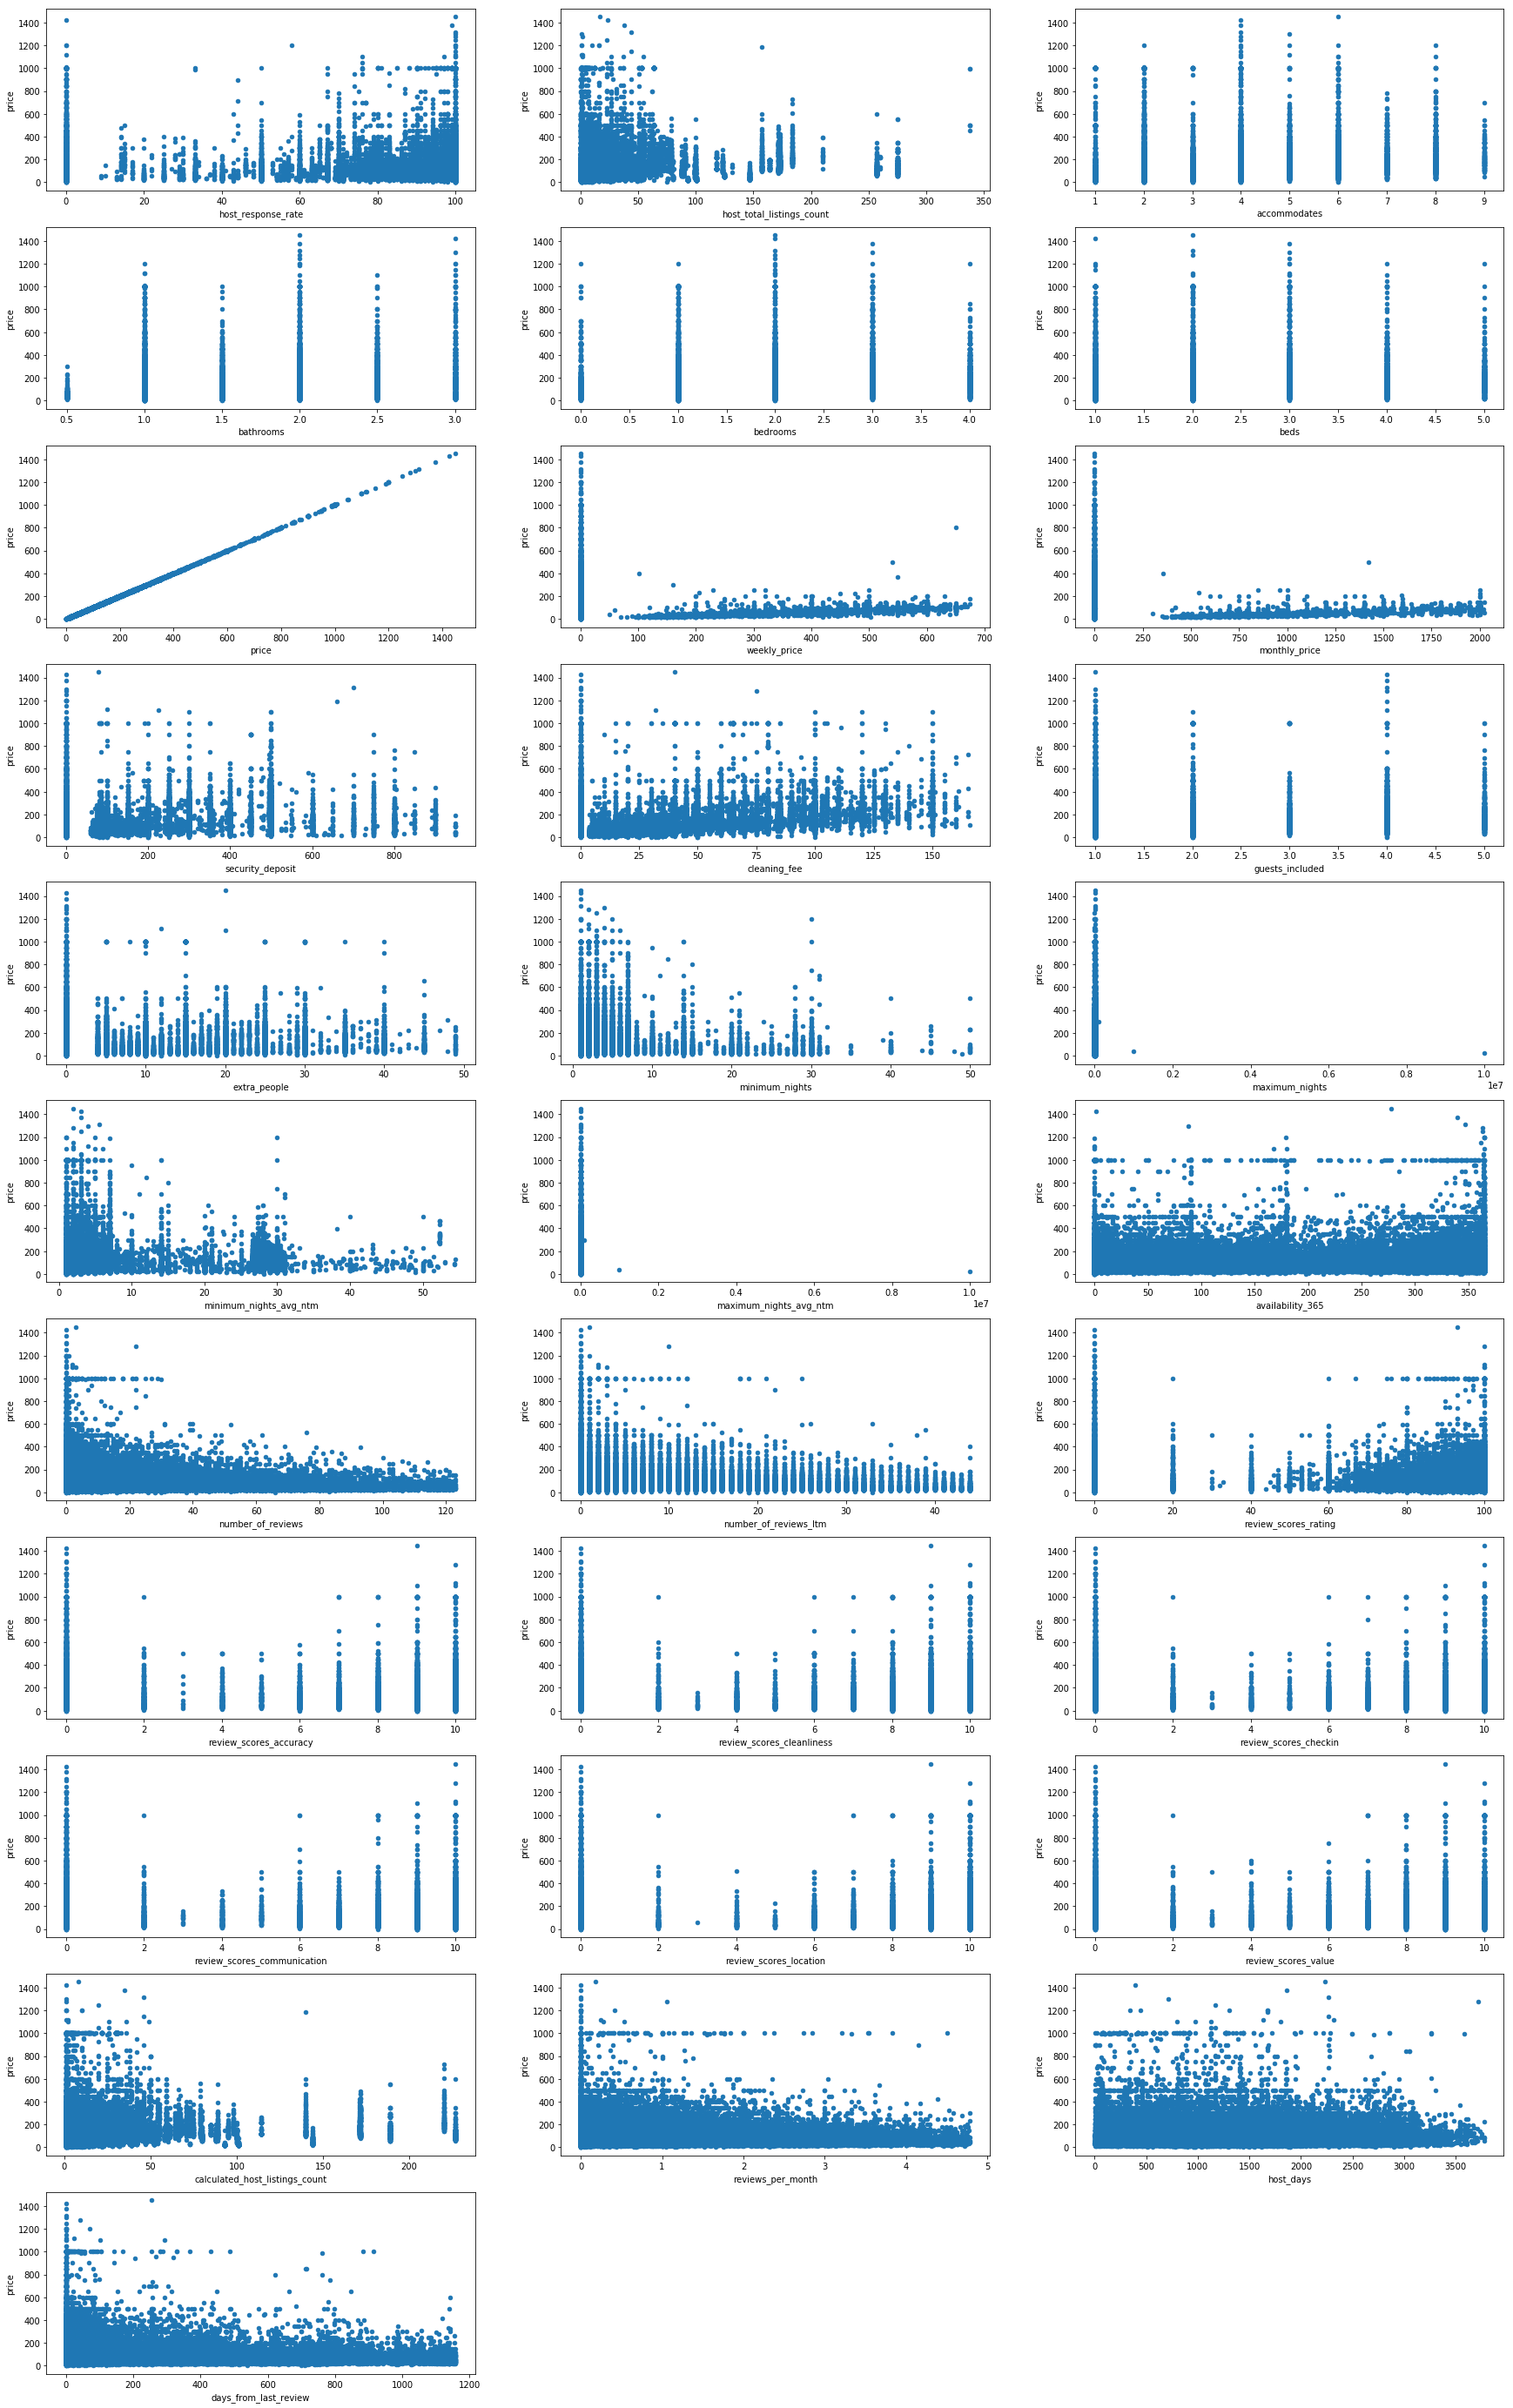

In [16]:
fig = plt.figure(figsize=(30,50))

for i, col in enumerate(london_num_z.columns):
    ax = fig.add_subplot(11, 3, i+1)
    london_num_z.plot.scatter(x = col, y = "price", ax=ax)

In [17]:
y=london_num_z['price']
X=london_num_z.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.7)

stdscaler = StandardScaler()
stdscaler.fit(X_train, y_train)
    
X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = stdscaler.transform(X_test), columns = X_test.columns)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

print('Training r^2:', linreg.score(X_train_scaled, y_train))
print('Testing r^2:', linreg.score(X_test_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test_scaled)))

Training r^2: 0.3093853517519912
Testing r^2: -42.2102324120418
Training MSE: 6571.92239366087
Testing MSE: 398710.6171200466


In [18]:
london_num_z[london_num_z.columns[1:]].corr()['price'][:].sort_values(ascending = False)

price                             1.000000
accommodates                      0.457964
beds                              0.373139
cleaning_fee                      0.369401
bedrooms                          0.366837
bathrooms                         0.277356
security_deposit                  0.240976
guests_included                   0.208823
host_total_listings_count         0.179524
calculated_host_listings_count    0.171852
availability_365                  0.151010
minimum_nights_avg_ntm            0.056447
minimum_nights                    0.017071
maximum_nights                   -0.001382
maximum_nights_avg_ntm           -0.001517
extra_people                     -0.003895
reviews_per_month                -0.058476
monthly_price                    -0.071108
host_days                        -0.072504
weekly_price                     -0.072616
number_of_reviews_ltm            -0.077272
review_scores_location           -0.087209
review_scores_cleanliness        -0.092834
days_from_l

In [19]:
check_mcorr = london_num_z.drop(labels = ['price'], axis = 1)
check_mcorr[check_mcorr.columns[1:]].corr()['accommodates'][:].sort_values(ascending = False)

accommodates                      1.000000
beds                              0.799795
bedrooms                          0.692229
cleaning_fee                      0.491619
guests_included                   0.430661
bathrooms                         0.368879
security_deposit                  0.270428
calculated_host_listings_count    0.131136
host_total_listings_count         0.127753
extra_people                      0.114639
minimum_nights_avg_ntm            0.086513
review_scores_location            0.070212
reviews_per_month                 0.066779
review_scores_checkin             0.063689
review_scores_communication       0.062489
review_scores_accuracy            0.061755
review_scores_cleanliness         0.061434
review_scores_rating              0.058212
availability_365                  0.052798
review_scores_value               0.052021
number_of_reviews_ltm             0.026417
number_of_reviews                -0.000890
maximum_nights                   -0.000940
maximum_nig

In [20]:
drop_col=['beds','bedrooms','cleaning_fee','guests_included','bathrooms','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location','maximum_nights', 'maximum_nights_avg_ntm', 
          'extra_people', 'calculated_host_listings_count']

london_num_z_first_it=london_num_z.drop(labels = drop_col, axis = 1)
london_num_z_first_it[london_num_z_first_it.columns[1:]].corr()['price'][:].sort_values(ascending = False)

price                        1.000000
accommodates                 0.457964
security_deposit             0.240976
host_total_listings_count    0.179524
availability_365             0.151010
minimum_nights_avg_ntm       0.056447
minimum_nights               0.017071
reviews_per_month           -0.058476
monthly_price               -0.071108
host_days                   -0.072504
weekly_price                -0.072616
number_of_reviews_ltm       -0.077272
days_from_last_review       -0.094141
number_of_reviews           -0.097251
review_scores_value         -0.110068
Name: price, dtype: float64

In [21]:
y=london_num_z_first_it['price']
X=london_num_z_first_it.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.7)

stdscaler = StandardScaler()
stdscaler.fit(X_train, y_train)
    
X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = stdscaler.transform(X_test), columns = X_test.columns)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

print('Training r^2:', linreg.score(X_train_scaled, y_train))
print('Testing r^2:', linreg.score(X_test_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test_scaled)))

Training r^2: 0.2709221324396913
Testing r^2: 0.2807621387426539
Training MSE: 6937.940248874415
Testing MSE: 6636.570911803351


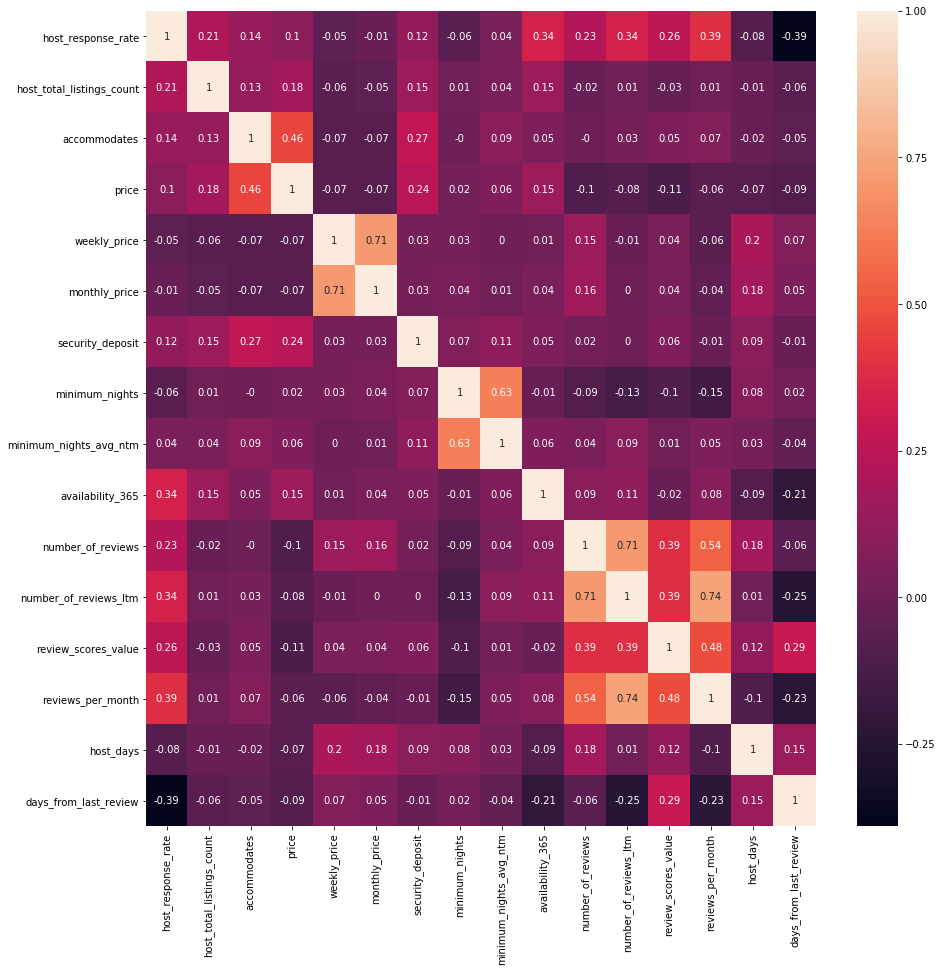

In [22]:
var_corr1 = round(london_num_z_first_it.corr(), 2)
plt.figure(figsize=(15,15))
sns.heatmap(var_corr1, xticklabels=var_corr1.columns, yticklabels=var_corr1.columns, annot=True)

In [23]:
london_num_log=london_num.copy()
london_price=london_num_log['price']
london_num_log=london_num_log.drop(['price'], axis=1)
for col in london_num_log.columns:
    london_num_log[col]=london_num_log[col].map(lambda x:np.log(x))

In [24]:
london_log_merged=pd.concat([london_price, london_num_log], axis=1)

In [25]:
# fig = plt.figure(figsize=(30,50))

# for i, col in enumerate(london_log_merged.columns):
#     ax = fig.add_subplot(11, 4, i+1)
#     london_log_merged.plot.scatter(x = col, y = "price", ax=ax)

In [26]:
# y=london_log_merged['price']
# X=london_log_merged.drop(['price'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.7)

# stdscaler = StandardScaler()
# stdscaler.fit(X_train, y_train)
    
# X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train), columns = X_train.columns)
# X_test_scaled = pd.DataFrame(data = stdscaler.transform(X_test), columns = X_test.columns)

# linreg = LinearRegression()
# linreg.fit(X_train_scaled, y_train)

# print('Training r^2:', linreg.score(X_train_scaled, y_train))
# print('Testing r^2:', linreg.score(X_test_scaled, y_test))
# print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_scaled)))
# print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test_scaled)))

In [27]:
london_num_minmax=london_num.copy()
london_minmax_price=london_num_minmax['price']
london_num_minmax=london_num_minmax.drop(['price'], axis=1)
for col in london_num_minmax.columns:
    minv=london_num_minmax[col].min()
    maxv=london_num_minmax[col].max()
    london_num_minmax[col]=(london_num_minmax-minv)/(maxv-minv)

In [28]:
london_minmax_merged=pd.concat([london_minmax_price, london_num_minmax], axis=1)
# fig = plt.figure(figsize=(30,50))

# for i, col in enumerate(london_minmax_merged.columns):
#     ax = fig.add_subplot(11, 4, i+1)
#     london_minmax_merged.plot.scatter(x = col, y = "price", ax=ax)

In [29]:
y=london_minmax_merged['price']
X=london_minmax_merged.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.7)

stdscaler = StandardScaler()
stdscaler.fit(X_train, y_train)
    
X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = stdscaler.transform(X_test), columns = X_test.columns)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

print('Training r^2:', linreg.score(X_train_scaled, y_train))
print('Testing r^2:', linreg.score(X_test_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test_scaled)))

Training r^2: 0.0012447191131658153
Testing r^2: 0.00109475121703706
Training MSE: 201345.67686013912
Testing MSE: 187605.19622399856


In [30]:
london_num_std=london_num.copy()
london_std_price=london_num_std['price']
london_num_std=london_num_std.drop(['price'], axis=1)
for col in london_num_std.columns:
    mean=london_num_std[col].mean()
    std=london_num_std[col].std()
    london_num_std[col]=(london_num_std[col]-mean)/std

In [31]:
london_std_merged=pd.concat([london_std_price, london_num_std], axis=1)
# fig = plt.figure(figsize=(30,50))

# for i, col in enumerate(london_std_merged.columns):
#     ax = fig.add_subplot(11, 4, i+1)
#     london_std_merged.plot.scatter(x = col, y = "price", ax=ax)

In [32]:
y=london_std_merged['price']
X=london_std_merged.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.7)

stdscaler = StandardScaler()
stdscaler.fit(X_train, y_train)
    
X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = stdscaler.transform(X_test), columns = X_test.columns)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

print('Training r^2:', linreg.score(X_train_scaled, y_train))
print('Testing r^2:', linreg.score(X_test_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test_scaled)))

Training r^2: 0.04812202043699165
Testing r^2: -657404.4636141572
Training MSE: 191895.37192053313
Testing MSE: 123467847576.46198


In [33]:
drop_col=['beds','bedrooms','cleaning_fee','guests_included','bathrooms','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location','maximum_nights', 'maximum_nights_avg_ntm', 
          'extra_people', 'calculated_host_listings_count']


london_num_z_first_it=london_num_z.drop(labels = drop_col, axis = 1)
london_num_z_first_it[london_num_z_first_it.columns[1:]].corr()['price'][:].sort_values(ascending = False)

price                        1.000000
accommodates                 0.457964
security_deposit             0.240976
host_total_listings_count    0.179524
availability_365             0.151010
minimum_nights_avg_ntm       0.056447
minimum_nights               0.017071
reviews_per_month           -0.058476
monthly_price               -0.071108
host_days                   -0.072504
weekly_price                -0.072616
number_of_reviews_ltm       -0.077272
days_from_last_review       -0.094141
number_of_reviews           -0.097251
review_scores_value         -0.110068
Name: price, dtype: float64

In [34]:
london_num_z_first_it.columns

Index(['host_response_rate', 'host_total_listings_count', 'accommodates',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'minimum_nights', 'minimum_nights_avg_ntm', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_value',
       'reviews_per_month', 'host_days', 'days_from_last_review'],
      dtype='object')

In [35]:
y1=london_num_z_first_it['price']
X1=london_num_z_first_it.drop(['price'], axis=1)

In [36]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test dataframes with targets'''
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.7)
    
    
    
    # remove "object"-type features and SalesPrice from `X`
    X_train_cf = X_train[[column for column in X.columns if X[column].dtype != "object"]]
    X_test_cf = X_test[[column for column in X.columns if X[column].dtype != "object"]]
    
    # Scale the train and test data
    stdscaler = StandardScaler()
    stdscaler.fit(X_train_cf)
    
    X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train_cf), columns = X_train_cf.columns)
    X_test_scaled = pd.DataFrame(data = stdscaler.transform(X_test_cf), columns = X_test_cf.columns)
    
    # Create X_cat which contains only the categorical variables
    X_train_cat = X_train[[column for column in X.columns if X[column].dtype == "object"]]
    X_test_cat = X_test[[column for column in X.columns if X[column].dtype == "object"]]
    
    # OneHotEncode Categorical variables
    enc = OneHotEncoder(handle_unknown='ignore', dtype = "int64")
    enc.fit(X_train_cat)
    X_train_enc = enc.transform(X_train_cat)
    X_test_enc = enc.transform(X_test_cat)
    columns = enc.get_feature_names(input_features=X_train_cat.columns)
    X_train_enc = pd.DataFrame(X_train_enc.todense(), columns=columns)
    X_test_enc = pd.DataFrame(X_test_enc.todense(), columns=columns)
    
    # combine categorical and continuous features into the final dataframe
    X_train_all = pd.concat([X_train_scaled, X_train_enc], axis = 1)
    X_test_all = pd.concat([X_test_scaled, X_test_enc], axis = 1)
    
    return X_train_all, X_test_all, y_train, y_test

In [37]:
X_train1, X_test1, y_train1, y_test1=preprocess(X1, y1)

In [38]:
def run_lasso(X_train, X_test, y_train, y_test):
    train_mse = []
    test_mse = []
    alphas = []
    train_R2 = []
    test_R2 = []
    coefs = []
    kf = KFold(10, shuffle=True, random_state = 1)

    for alpha in np.linspace(0, 40, num=200):
        lasso = Lasso(alpha = alpha)
        
        mses = np.mean(cross_val_score(lasso, X_train, y_train,
                       scoring = 'neg_mean_squared_error', cv=kf))
        
        lasso.fit(X_train, y_train)

        train_preds = lasso.predict(X_train)
        train_R2.append(lasso.score(X_train, y_train))
        train_mse.append(mean_squared_error(y_train, train_preds))

        test_preds = lasso.predict(X_test)
        test_R2.append(lasso.score(X_test, y_test))
        test_mse.append(mean_squared_error(y_test, test_preds))

        alphas.append(alpha)
        coefs.append(lasso.coef_)

    df_alpha = pd.DataFrame({"alpha":alphas, "Training_r^2": train_R2, "MSE_train": train_mse, "Testing_r^2": test_R2,
                             "MSE_test": test_mse, "Coefficients": coefs, 'mses':mses})
    return df_alpha.sort_values(by="Training_r^2", ascending = False)

In [39]:
run_lasso(X_train1, X_test1, y_train1, y_test1).head()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147384208.7289948, tolerance: 40692.188257768226
  positive)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit

,alpha,Training_r^2,MSE_train,Testing_r^2,MSE_test,Coefficients,mses
0,0.000000,0.270922,6937.940249,0.280762,6636.570912,"[1.9902358485056868, 7.77211142103377, 39.5790...",-9153.153002
1,0.201005,0.270863,6938.504782,0.280797,6636.247179,"[1.7942302229399072, 7.689069737222245, 39.501...",-9153.153002
2,0.402010,0.270685,6940.198966,0.280708,6637.073480,"[1.5978473237233133, 7.60599686319716, 39.4241...",-9153.153002
3,0.603015,0.270462,6942.322167,0.280574,6638.307894,"[1.4126342907144906, 7.516943204110112, 39.321...",-9153.153002
4,0.804020,0.270233,6944.502547,0.280395,6639.960826,"[1.2327082999785428, 7.42396252910863, 39.2028...",-9153.153002


In [40]:
london_merged_z.shape

(67147, 39)

In [41]:
y2=london_merged_z['price']
X2=london_merged_z.drop(['price'], axis=1)

In [42]:
X_train2, X_test2, y_train2, y_test2=preprocess(X2, y2)

In [43]:
run_lasso(X_train2, X_test2, y_train2, y_test2).head()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140954968.46047252, tolerance: 40738.53017686106
  positive)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit

,alpha,Training_r^2,MSE_train,Testing_r^2,MSE_test,Coefficients,mses
0,0.000000,0.308011,6648.349323,0.310996,6366.121515,"[3.083020674767427, 0.0, -0.6905211721619869, ...",-9209.675664
1,0.201005,0.306257,6665.197194,0.308953,6384.998909,"[2.8459018991866114, 0.0, -0.5735041800648758,...",-9209.675664
2,0.402010,0.302634,6700.008251,0.305025,6421.294584,"[2.449659031732646, 0.0, -0.43687572849169876,...",-9209.675664
3,0.603015,0.301070,6715.036968,0.303319,6437.058519,"[2.1158051733865544, 0.0, -0.2610640425043006,...",-9209.675664
4,0.804020,0.300493,6720.578339,0.302909,6440.839803,"[1.771441944106401, 0.0, -0.1249877284562114, ...",-9209.675664


In [44]:
df_upd=pd.read_csv('londonairbnb_cleaned2.csv')
df_upd.head()

,id,last_scraped,experiences_offered,host_since,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days,days_from_last_review,amenities_count
0,11551.0,2019-09-15,family,2009-10-03,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Brixton,Lambeth,...,0,1,2.0,2.0,0.0,0.0,1.59,3634.0,67.0,23
1,13913.0,2019-09-15,business,2009-11-16,0,"['email', 'phone', 'facebook', 'reviews']",1,0,LB of Islington,Islington,...,0,0,3.0,1.0,2.0,0.0,0.14,3590.0,97.0,55
2,15400.0,2019-09-15,romantic,2009-12-05,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Chelsea,Kensington and Chelsea,...,1,1,1.0,1.0,0.0,0.0,0.73,3571.0,19.0,29
3,17402.0,2019-09-15,none,2010-01-04,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,City of Westminster,Westminster,...,0,0,15.0,15.0,0.0,0.0,0.40,3541.0,88.0,31
4,24328.0,2019-09-15,family,2009-09-28,0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,LB of Wandsworth,Wandsworth,...,1,1,1.0,1.0,0.0,0.0,0.86,3639.0,99.0,27


In [45]:
df_amenities=df_upd['amenities_count']

In [46]:
london_merged_am=pd.concat([london_merged, df_amenities], axis=1)
london_merged_am_z=london_merged_am[(np.abs(stats.zscore(london_merged_am)) < 3).all(axis=1)]

In [47]:
y3=london_merged_am_z['price']
X3=london_merged_am_z.drop(['price'], axis=1)

In [48]:
X_train3, X_test3, y_train3, y_test3=preprocess(X3, y3)

In [49]:
run_lasso(X_train3, X_test3, y_train3, y_test3).head()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140091349.25332153, tolerance: 40455.252625834524
  positive)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fi

,alpha,Training_r^2,MSE_train,Testing_r^2,MSE_test,Coefficients,mses
0,0.000000,0.309766,6594.651286,0.299399,6475.396838,"[2.4578984829726647, 0.0, -0.7099149198208771,...",-9195.165832
1,0.201005,0.307219,6618.989912,0.301473,6456.227095,"[2.3038713754425113, 0.0, -0.6228141966486876,...",-9195.165832
2,0.402010,0.303915,6650.556446,0.300618,6464.131363,"[1.9101416612824293, 0.0, -0.49389828237705713...",-9195.165832
3,0.603015,0.302277,6666.203684,0.299822,6471.493465,"[1.5897324575660303, 0.0, -0.3237424894218657,...",-9195.165832
4,0.804020,0.301321,6675.341732,0.299083,6478.320907,"[1.2655976039677632, 0.0, -0.17995281484849018...",-9195.165832


In [50]:
def run_ridge(X_train, X_test, y_train, y_test):
    train_mse = []
    test_mse = []
    alphas = []
    train_R2 = []
    test_R2 = []
    coefs = []
    kf = KFold(10, shuffle=True, random_state = 1)

    for alpha in np.linspace(0, 40, num=200):
        ridge = Ridge(alpha = alpha)
        
        mses = np.mean(cross_val_score(ridge, X_train, y_train,
                       scoring = 'neg_mean_squared_error', cv=kf))
        
        ridge.fit(X_train, y_train)

        train_preds = ridge.predict(X_train)
        train_R2.append(ridge.score(X_train, y_train))
        train_mse.append(mean_squared_error(y_train, train_preds))

        test_preds = ridge.predict(X_test)
        test_R2.append(ridge.score(X_test, y_test))
        test_mse.append(mean_squared_error(y_test, test_preds))

        alphas.append(alpha)
        coefs.append(ridge.coef_)

    df_alpha = pd.DataFrame({"alpha":alphas, "Training_r^2": train_R2, "MSE_train": train_mse, "Testing_r^2": test_R2,
                             "MSE_test": test_mse, "Coefficients": coefs, 'mses': mses})
    return df_alpha.sort_values(by="Training_r^2", ascending = False)

In [51]:
run_ridge(X_train3, X_test3, y_train3, y_test3).head()

,alpha,Training_r^2,MSE_train,Testing_r^2,MSE_test,Coefficients,mses
1,0.201005,0.310003,6592.388502,0.297882,6489.424209,"[2.3976088053744755, 0.0, -0.6795685122730281,...",-7246.900793
2,0.402010,0.310003,6592.392514,0.297913,6489.133417,"[2.3990709235571077, 0.0, -0.6803270964249087,...",-7246.900793
3,0.603015,0.310002,6592.398968,0.297943,6488.852341,"[2.400497277138227, 0.0, -0.6810676611270402, ...",-7246.900793
4,0.804020,0.310001,6592.407689,0.297973,6488.580535,"[2.401889135371757, 0.0, -0.6817908460921871, ...",-7246.900793
5,1.005025,0.310000,6592.418514,0.298001,6488.317581,"[2.4032477081170596, 0.0, -0.6824972610963057,...",-7246.900793


In [52]:
def run_linear(X_train, X_test, y_train, y_test):
    
    kf = KFold(10, shuffle=True, random_state = 1)
    
    linreg = LinearRegression()
    mses = np.mean(cross_val_score(linreg, X_train, y_train,
                       scoring = 'neg_mean_squared_error', cv=kf))
    
    linreg.fit(X_train, y_train)
    
    train_R2 = linreg.score(X_train, y_train)
    test_R2 = linreg.score(X_test, y_test)
    train_mse = mean_squared_error(y_train, linreg.predict(X_train))
    test_mse = mean_squared_error(y_test, linreg.predict(X_test))
    coefs = linreg.coef_
    intercept = linreg.intercept_
    
    return train_R2, test_R2, train_mse, test_mse, coefs, intercept, mses

In [53]:
run_linear(X_train3, X_test3, y_train3, y_test3)

(0.30999835827716804,
 0.29876564807072603,
 6592.433511936388,
 6481.252879979791,
 array([ 2.39610959e+00, -7.94223991e+12, -6.61462488e-01, -9.01696501e-01,
         6.24939220e+13,  1.14376041e+00, -2.99675908e+13, -5.50716019e+13,
         1.25025878e+00,  2.61639450e+01,  2.84485128e+01,  8.82718199e+00,
         6.63725425e+00, -1.84273647e+00, -8.77178244e-01, -1.34920101e+00,
         7.24939873e+00,  1.35851143e+01, -3.06406481e-01, -6.47916077e+00,
        -1.85808752e+00,  1.15140335e+02,  5.99668180e-01, -1.14650878e+02,
         1.11866316e+01, -7.61067729e-01, -5.44802189e+00,  1.83354338e+01,
        -1.62204654e+00,  9.99601259e+00, -1.27307437e+01, -2.07792636e+01,
         2.90298446e+01, -3.22009877e+01, -2.07361721e+01, -2.50573734e+00,
        -3.82955822e+00, -9.67381042e-01,  2.58140994e+00]),
 100.87206283126972,
 -7334.239555162732)

In [54]:
london_merged_am_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66573 entries, 6 to 85255
Data columns (total 40 columns):
host_is_superhost                   66573 non-null int64
host_has_profile_pic                66573 non-null int64
host_identity_verified              66573 non-null int64
is_location_exact                   66573 non-null int64
requires_license                    66573 non-null int64
instant_bookable                    66573 non-null int64
require_guest_profile_picture       66573 non-null int64
require_guest_phone_verification    66573 non-null int64
host_response_rate                  66573 non-null int64
host_total_listings_count           66573 non-null int64
accommodates                        66573 non-null float64
bathrooms                           66573 non-null float64
bedrooms                            66573 non-null float64
beds                                66573 non-null float64
price                               66573 non-null float64
weekly_price              

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
//anaconda3/envs/learn-env/lib/python3.6/site-packages

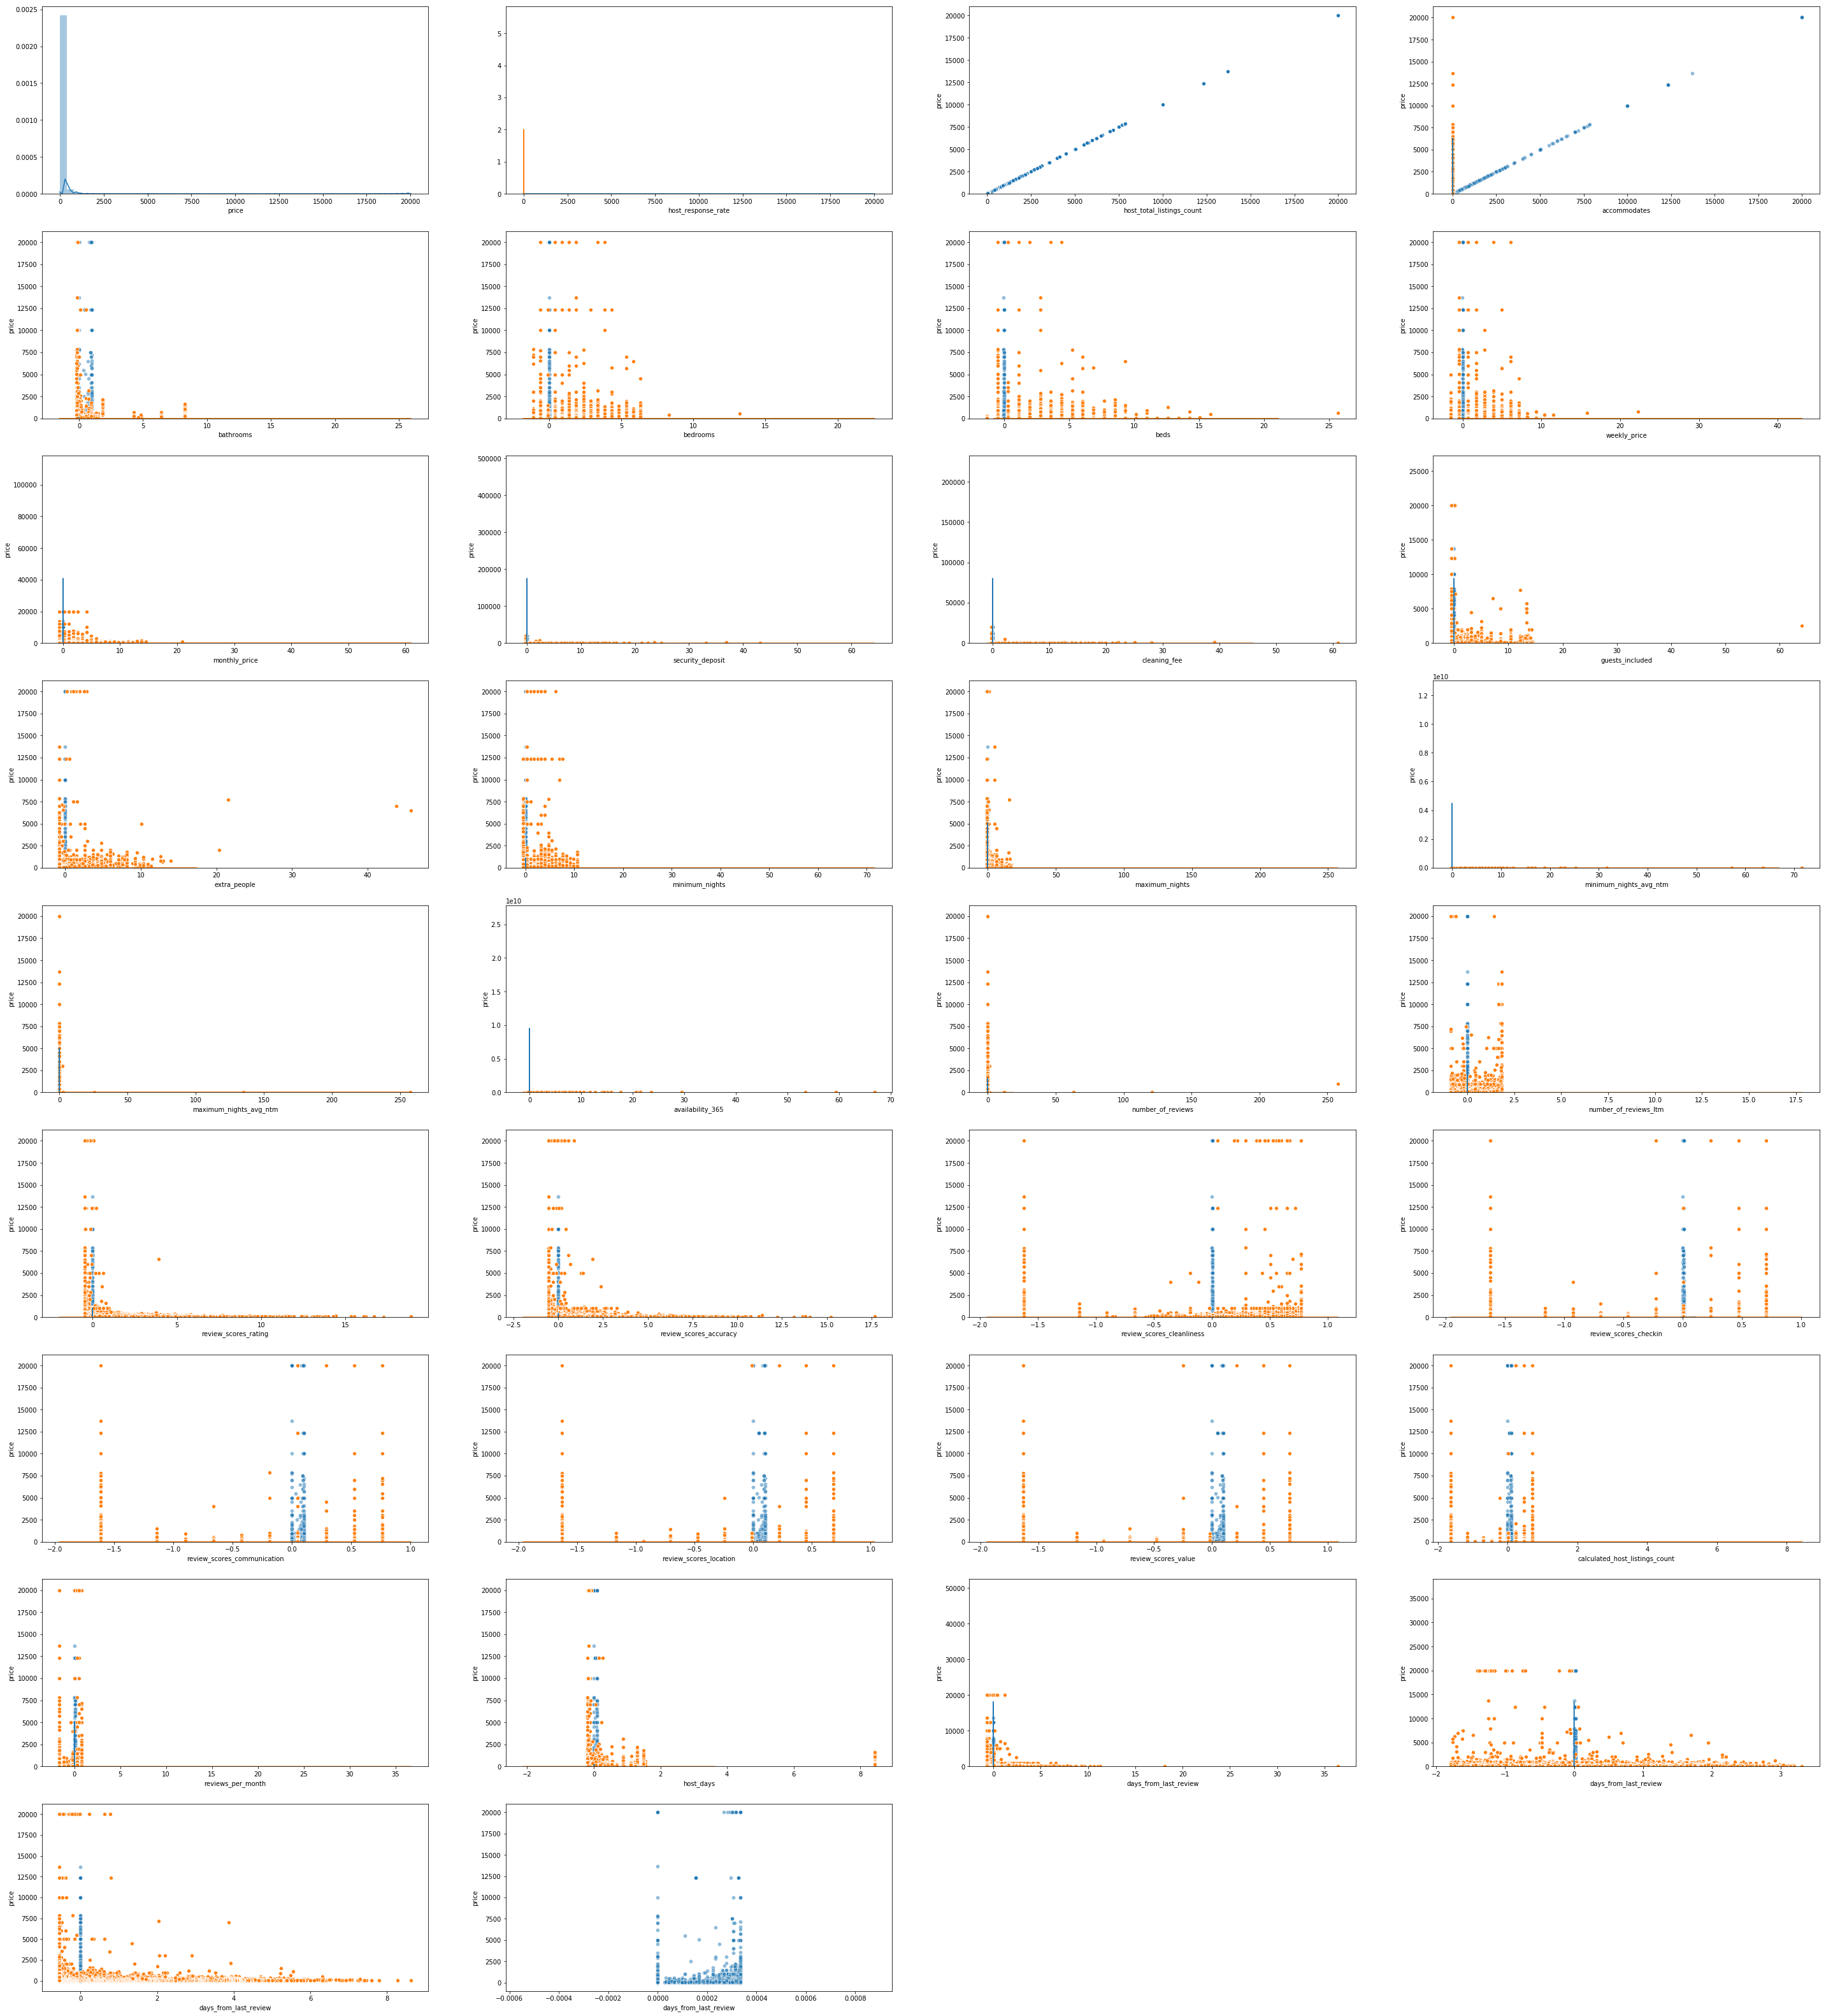

In [55]:



fig = plt.figure(figsize= (50,200))

for i, col in enumerate(london_std_merged.columns):
    ax1 = fig.add_subplot(31, 4, i+1)
    ax2 = fig.add_subplot(31, 4, i+2)
    ax3 = fig.add_subplot(31, 4, i+3)
    ax4 = fig.add_subplot(31, 4, i+4)
    sns.distplot(london_std_merged[col], ax=ax1)
    sns.distplot(london_minmax_merged[col], ax=ax2);
    sns.scatterplot(x=col, y="price", data=london_std_merged, ax=ax3)
    sns.scatterplot(x=col, y="price", data=london_minmax_merged, ax=ax4, alpha = 0.5)
    

plt.show()

In [56]:
london_num.plot.scatter(x = 'accomodates', y = "price", ax=ax)

KeyError: 'accomodates'